<a href="https://colab.research.google.com/github/gitShravyaa/IgApp/blob/main/ML_Project_Crime_Against_Women.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Summary

# 📊 ML Project: Crime Risk Assessment Against Women in Indian States

## 🎯 Objective
To assess and classify Indian states based on the severity of crimes against women using ML.

## 📁 Dataset
Source: IndiaDataPortal (District-wise crime statistics)

## 📌 Final Output
- Classified states into `Low`, `Medium`, and `High` risk
- Achieved **98% accuracy** with Random Forest
- Visualized risk levels across states

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load CSV from Google Drive
path = '/content/districtwise-crime-against-women-2017-onwards.csv'
df = pd.read_csv(path)

In [4]:
# View all column names with indices
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

0: id
1: year
2: state_name
3: state_code
4: district_name
5: district_code
6: registration_circles
7: murder_with_rape_gang_rape
8: dowry_deaths
9: abetment_to_suicide_of_women
10: miscarriage
11: acid_attack
12: attempt_to_acid_attack
13: cruelty_by_husband_or_his_relatives
14: kidnapping_and_abduction
15: kidnapping_abduction_in_order_to_murder
16: kidnapping_for_ransom
17: kidnp_and_abductn_of_women_above_18_for_marrg
18: kidnp_and_abductn_of_girls_below_18_for_marrg
19: procuration_of_minor_girls
20: importation_of_girls_from_foreign
21: kidnapping_and_abduction_of_women_others
22: human_trafficking
23: selling_of_minor_girls
24: buying_of_minor_girls
25: rape_women_above_18
26: rape_girls_below_18
27: attempt_to_commit_rape_above_18
28: attempt_to_commit_rape_girls_below_18
29: assault_on_womenabove_18
30: assault_on_women_below_18
31: insult_to_the_modesty_of_women_above_18
32: insult_to_the_modesty_of_women_below_18
33: dowry_prohibition
34: procuring_inducing_children_for_the_

In [5]:
# Example: Drop district info and columns 42–47
columns_to_drop = ['id']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [10]:
# View all updated column names with indices
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

0: year
1: state_name
2: state_code
3: district_name
4: district_code
5: registration_circles
6: murder_with_rape_gang_rape
7: dowry_deaths
8: abetment_to_suicide_of_women
9: miscarriage
10: acid_attack
11: attempt_to_acid_attack
12: cruelty_by_husband_or_his_relatives
13: kidnapping_and_abduction
14: kidnapping_abduction_in_order_to_murder
15: kidnapping_for_ransom
16: kidnp_and_abductn_of_women_above_18_for_marrg
17: kidnp_and_abductn_of_girls_below_18_for_marrg
18: procuration_of_minor_girls
19: importation_of_girls_from_foreign
20: kidnapping_and_abduction_of_women_others
21: human_trafficking
22: selling_of_minor_girls
23: buying_of_minor_girls
24: rape_women_above_18
25: rape_girls_below_18
26: attempt_to_commit_rape_above_18
27: attempt_to_commit_rape_girls_below_18
28: assault_on_womenabove_18
29: assault_on_women_below_18
30: insult_to_the_modesty_of_women_above_18
31: insult_to_the_modesty_of_women_below_18
32: dowry_prohibition
33: procuring_inducing_children_for_the_sake_of

In [7]:
df.head()

,year,state_name,state_code,district_name,district_code,registration_circles,murder_with_rape_gang_rape,dowry_deaths,abetment_to_suicide_of_women,miscarriage,...,protection_of_women_from_domestic_violence,publshng_or_transmitting_of_sexually_explicit_mtrl,other_women_centric_cyber_crimes,child_rape,sexual_assault_of_children,child_sexual_harassment,use_of_child_for_pornography,offences_of_pocso_act,pocso_act_unnatural_offences,indecent_representation_of_women
0,2017,Andhra Pradesh,28,Ananthapuramu,502,Anantapur,0.0,14.0,55.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
1,2017,Andhra Pradesh,28,Chittoor,503,Chittoor,0.0,8.0,24.0,1.0,...,0.0,0.0,0.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0
2,2017,Andhra Pradesh,28,Y.S.R.,504,Cuddapah,0.0,15.0,134.0,0.0,...,0.0,1.0,0.0,15.0,2.0,3.0,0.0,0.0,1.0,0.0
3,2017,Andhra Pradesh,28,East Godavari,505,East Godavari,0.0,10.0,18.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,2017,Andhra Pradesh,28,Ananthapuramu,502,Guntakal Railway,0.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Group by state and year, then sum all numeric crime columns
df_grouped = df.groupby(['state_name', 'year']).sum().reset_index()

In [11]:
# Recalculate total_cases
df_grouped['total_cases'] = df_grouped.iloc[:, 2:].sum(axis=1)  # Skip 'state_name' and 'year'

# Assign risk levels again
df_grouped['risk_level'] = pd.cut(
    df_grouped['total_cases'],
    bins=[-1, 200, 600, float('inf')],
    labels=['Low', 'Medium', 'High']
)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
df.shape

(5322, 39)

In [ ]:
df.head()

,year,state_name,state_code,murder_with_rape_gang_rape,dowry_deaths,abetment_to_suicide_of_women,miscarriage,acid_attack,attempt_to_acid_attack,cruelty_by_husband_or_his_relatives,...,dowry_prohibition,procuring_inducing_children_for_the_sake_of_prostitution,detaining_a_prsn_in_premises_where_prost_is_carried,prostitution_in_or_in_the_vicinity_of_public_places,seducing_or_soliciting_for_purpose_of_prostitution,other_sections_under_itp_act,protection_of_women_from_domestic_violence,publshng_or_transmitting_of_sexually_explicit_mtrl,other_women_centric_cyber_crimes,indecent_representation_of_women
0,2017,Andhra Pradesh,28,0.0,14.0,55.0,0.0,0.0,0.0,471.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017,Andhra Pradesh,28,0.0,8.0,24.0,1.0,0.0,0.0,212.0,...,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017,Andhra Pradesh,28,0.0,15.0,134.0,0.0,0.0,0.0,481.0,...,7.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2017,Andhra Pradesh,28,0.0,10.0,18.0,0.0,1.0,0.0,601.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2017,Andhra Pradesh,28,0.0,3.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Drop non-numerical or irrelevant features
X = df_grouped.drop(columns=['state_name', 'state_code', 'year', 'risk_level'])

# Target label
y = df_grouped['risk_level']

In [ ]:
df.tail()

,year,state_name,state_code,murder_with_rape_gang_rape,dowry_deaths,abetment_to_suicide_of_women,miscarriage,acid_attack,attempt_to_acid_attack,cruelty_by_husband_or_his_relatives,...,dowry_prohibition,procuring_inducing_children_for_the_sake_of_prostitution,detaining_a_prsn_in_premises_where_prost_is_carried,prostitution_in_or_in_the_vicinity_of_public_places,seducing_or_soliciting_for_purpose_of_prostitution,other_sections_under_itp_act,protection_of_women_from_domestic_violence,publshng_or_transmitting_of_sexually_explicit_mtrl,other_women_centric_cyber_crimes,indecent_representation_of_women
5317,2022,Jammu And Kashmir,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5318,2022,Jammu And Kashmir,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5319,2022,Jammu And Kashmir,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5320,2022,Jammu And Kashmir,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5321,2022,Jammu And Kashmir,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Train and test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
#Model Selection and Training

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Model Evaluation

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[29  0  0]
 [ 0  7  0]
 [ 0  1  6]]
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        29
         Low       0.88      1.00      0.93         7
      Medium       1.00      0.86      0.92         7

    accuracy                           0.98        43
   macro avg       0.96      0.95      0.95        43
weighted avg       0.98      0.98      0.98        43



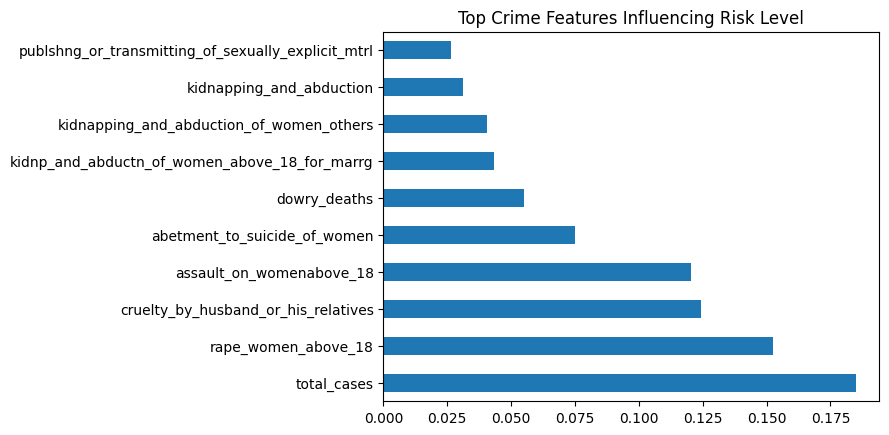

In [ ]:
# Feature Importance Plot

import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top Crime Features Influencing Risk Level")
plt.show()

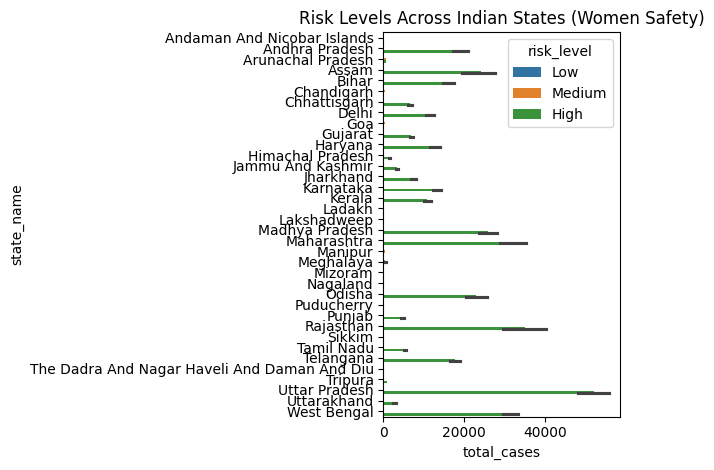

In [ ]:
#Risk Map / Heat Map

# Example: plot state_name vs total_cases
import seaborn as sns

sns.barplot(x='total_cases', y='state_name', hue='risk_level', data=df_grouped)
plt.title("Risk Levels Across Indian States (Women Safety)")
plt.tight_layout()
plt.show()

In [ ]:
#Comparing Random Forest with Logistic Regression

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

print(classification_report(y_test, log_preds))

              precision    recall  f1-score   support

        High       0.97      1.00      0.98        29
         Low       0.75      0.86      0.80         7
      Medium       0.80      0.57      0.67         7

    accuracy                           0.91        43
   macro avg       0.84      0.81      0.82        43
weighted avg       0.90      0.91      0.90        43



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


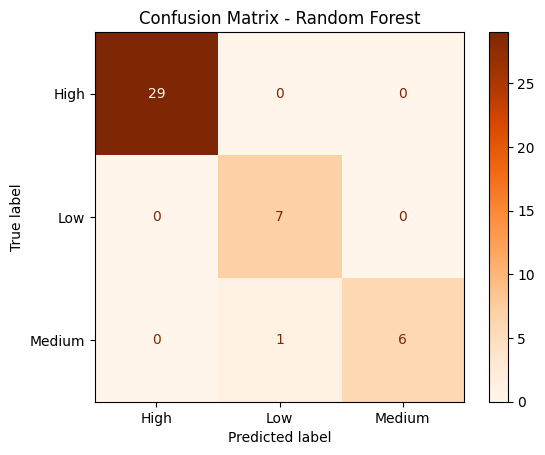

In [ ]:
#Confusion Matrix as HeatMap

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Oranges')
plt.title("Confusion Matrix - Random Forest")
plt.show()